# P4.01 EDA, Data Cleaning, Feature engineering

### Prelim EDA and Data Cleaning

**Note:** google colab doesn't support magic line, please comment-in `%matplotlib.inline` before running notebook in Jupyter.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Read file from github as dataframe

df_spray = pd.read_csv("https://raw.githubusercontent.com/AngShengJun/dsi14P4/master/assets/input/spray.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/AngShengJun/dsi14P4/master/assets/input/test.csv")
df_train = pd.read_csv("https://raw.githubusercontent.com/AngShengJun/dsi14P4/master/assets/input/train.csv")
df_weather = pd.read_csv("https://raw.githubusercontent.com/AngShengJun/dsi14P4/master/assets/input/weather.csv")

In [3]:
# Define function for basic eda

def data_explore(df):
    #First two rows
    print("First two rows of data:")
    display(df.head(2))
    print()
    # Print shape of dataframe
    print(f"Shape: {df.shape}")
    print()
    # Print datatypes
    print("Columns & Datatypes: ")
    df.info()
    print()
    # Check for null values
    print("Null values:")
    if df.isnull().values.any() == False:
        print("None in Dataframe.")
    else:
        for col in df:
            print(f"{col}:{df[col].isnull().sum()}")
    print()
    # Count of distinct values
    print("Unique values (by Columns)")
    for col in df:
        print(f"{col}:{len(df[col].unique().tolist())}")
    print()
    # Inform if there are duplicates, if any
    if df.duplicated(subset=None, keep='first').any() == False:
      print("No duplicates present.")
    else:
        dup = df[df.duplicated(subset=None, keep='first')]
        print(f"{len(dup)} duplicates in {len(df)} rows.")

In [4]:
# Define function to review duplicates
# Only relevant for dataframe with duplicates
def review_dup(df): 
    print("First 5 rows of duplicates:")
    display(df[df.duplicated(subset=None, keep='first')].head())

In [5]:
# Define function to drop duplicates and review rows
# Only relevant for dataframe with duplicates
def drop_dup(df):
    print(f"Initial rows: {df.shape[0]}")
    df.drop_duplicates(subset=None, inplace=True)
    print(f"Remaining rows: {df.shape[0]}")

### Spray data

In [6]:
# Review spray data
data_explore(df_spray)

First two rows of data:


,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163



Shape: (14835, 4)

Columns & Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB

Null values:
Date:0
Time:584
Latitude:0
Longitude:0

Unique values (by Columns)
Date:10
Time:8584
Latitude:12887
Longitude:13007

541 duplicates in 14835 rows.


- 584 null values in `time` column. 
- 541 duplicates. 
- Further review to determine way to manage null value and duplicates.

In [7]:
# Set column name to lowercase, shorten if possible.
df_spray.columns = ['date', 'time', 'lat', 'long']
# Convert date to datetime format
df_spray['date'] = pd.to_datetime(df_spray['date'])

In [8]:
# Review NaN value in spray data; first 5 rows
df_spray.loc[df_spray['time'].isnull()].head()

,date,time,lat,long
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014


The missing values seems to be in the Time, but we can review the entire dataframe using Missingno method.

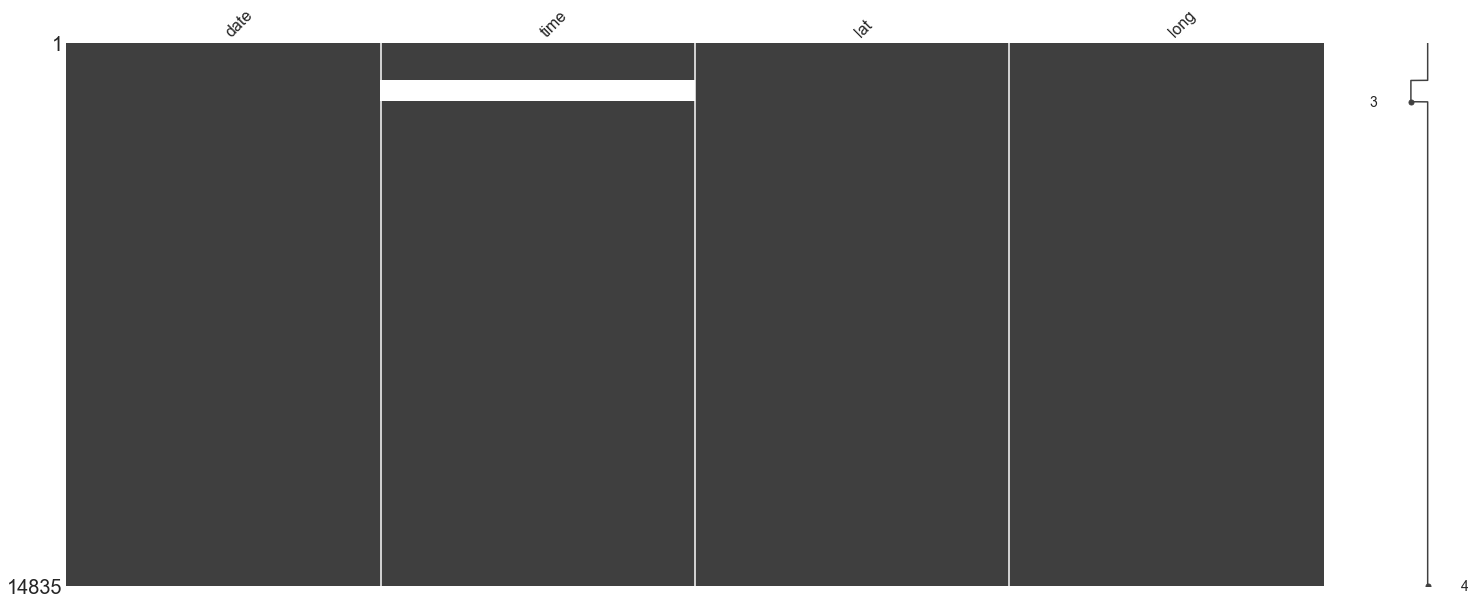

In [9]:
#Visualize missing values as a matrix using Missingno
#shows the amount and positions of missing values within the dataframe
#right hand side is line plot for each row's data completeness
#all columns completed except Time coloumn (beginning part of the dataframe)
msno.matrix(df_spray);

Missingno matrix facilitates locating visually, missing values within a dataframe. In this instance, `time` column has missing values in the upper part of the spray data. We could rely on `date`; seems adequate (for now) to inform on areas sprayed over time. We can always revisit to impute the NaN values for `time` later if the time values are selected as predictor.

In [10]:
# Review duplicate in dataframe
review_dup(df_spray)

First 5 rows of duplicates:


,date,time,lat,long
485,2011-09-07,7:43:40 PM,41.983917,-87.793088
490,2011-09-07,7:44:32 PM,41.986460,-87.794225
491,2011-09-07,7:44:32 PM,41.986460,-87.794225
492,2011-09-07,7:44:32 PM,41.986460,-87.794225
493,2011-09-07,7:44:32 PM,41.986460,-87.794225


In [11]:
# Drop duplicates, reset index
drop_dup(df_spray)
df_spray.reset_index(inplace=True,drop=True)
df_spray.head()

Initial rows: 14835
Remaining rows: 14294


,date,time,lat,long
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [12]:
# Checking the range of lat and lon between spray, train and test data
display(df_test.describe())
display(df_train.describe())

,Id,Block,Latitude,Longitude,AddressAccuracy
count,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000
mean,58147.000000,41.131100,41.849389,-87.693658,7.954357
std,33571.041765,24.864726,0.106593,0.080699,1.252733
min,1.000000,10.000000,41.644612,-87.930995,3.000000
25%,29074.000000,18.000000,41.753411,-87.750938,8.000000
50%,58147.000000,39.000000,41.862292,-87.694991,8.000000
75%,87220.000000,61.000000,41.951866,-87.648860,9.000000
max,116293.000000,98.000000,42.017430,-87.531635,9.000000


,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [13]:
# Dropping row in spray data where lat-long values beyond train and test lat-lon.
# Remove those where long > -88.0; latitude > 42.1
df_spray.describe()

,lat,long
count,14294.000000,14294.000000
mean,41.901739,-87.734512
std,0.105100,0.067599
min,41.713925,-88.096468
25%,41.782669,-87.789607
50%,41.937578,-87.724781
75%,41.977217,-87.692107
max,42.395983,-87.586727


In [14]:
# long within test and train long range
# Remove rows with lat > 42.1, assign to df_s
df_s = df_spray[df_spray['lat'] <= 42.1]

In [15]:
# Check lat max is within range
df_s.describe()

,lat,long
count,14199.000000,14199.000000
mean,41.898456,-87.732111
std,0.097461,0.061096
min,41.713925,-87.871023
25%,41.782290,-87.788612
50%,41.937205,-87.724390
75%,41.976710,-87.691572
max,42.018907,-87.586727


In [16]:
# Checking off datatypes of cleaned spray data
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14199 entries, 95 to 14293
Data columns (total 4 columns):
date    14199 non-null datetime64[ns]
time    13615 non-null object
lat     14199 non-null float64
long    14199 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 554.6+ KB


### Test data

In [17]:
# Review test data
data_explore(df_test)

First two rows of data:


,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9



Shape: (116293, 11)

Columns & Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
Id                        116293 non-null int64
Date                      116293 non-null object
Address                   116293 non-null object
Species                   116293 non-null object
Block                     116293 non-null int64
Street                    116293 non-null object
Trap                      116293 non-null object
AddressNumberAndStreet    116293 non-null object
Latitude                  116293 non-null float64
Longitude                 116293 non-null float64
AddressAccuracy           116293 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB

Null values:
None in Dataframe.

Unique values (by Columns)
Id:116293
Date:95
Address:151
Species:8
Block:65
Street:139
Trap:149
AddressNumberAndStreet:151
Latitude:151
Longitude:151
AddressAccuracy:4

No duplicates present.


The `Latitiude` and `Longitude` information should be sufficient as proxies for Address information. `Address`, `Block`, `Street`, `AddressNumberAndStreet`,`AddressAccuracy` not need to use.

In [18]:
# Address columns are redunant, drop them
df_test.drop(['Address', 'Block', 'Street', 'AddressNumberAndStreet','AddressAccuracy'], axis=1,inplace=True)
#Set column name to lowercase, shorten if possible.
df_test.columns = ['id','date','spc','trap','lat','long']
# Convert date to datetime format
df_test['date'] = pd.to_datetime(df_test['date'])

In [19]:
# Checking off datatype of cleaned test set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 6 columns):
id      116293 non-null int64
date    116293 non-null datetime64[ns]
spc     116293 non-null object
trap    116293 non-null object
lat     116293 non-null float64
long    116293 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 5.3+ MB


### Train data

In [20]:
# Review train data
data_explore(df_train)

First two rows of data:


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0



Shape: (10506, 12)

Columns & Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB

Null values:
None in Dataframe.

Unique values (by Columns)
Date:95
Address:138
Species:7
Block:64
Street:128
Trap:136
AddressNumberAndStreet:138
Latitude:138
Longitude:138
AddressAccuracy:4
NumMosquitos:50
Wn

On test and train datasets, there is more test data than train data. The train data contains columns `NumMosquitos` and `WnvPresent`, which are notably absent in test data. There are no missing values and 813 duplicates in train set.

Management of duplicates for train data needs a different take, because of the newline-entry once mosquito count for particular species exceeds 50 for any traps (info from Kaggle). Dropping duplicates may work, but doesn't fully address instances whether mosquitos number more than 100 (2nd line entry would be dropped). So another approach could be to sum mosquitos across rows where the date, trap, and species are the same. 

We start by applying similar drop address and column renaming treatment first, then address the mosquito count across the rows.

In [21]:
# Address columns are redunant, drop them
df_train.drop(['Address', 'Block', 'Street', 'AddressNumberAndStreet','AddressAccuracy'], axis=1,inplace=True)
#Set column name to lowercase, shorten if possible.
df_train.columns = ['date','spc','trap','lat','long','num_mos','wnv']
# Convert date to datetime format
df_train['date'] = pd.to_datetime(df_train['date'])

In [22]:
# Review datatypes 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 7 columns):
date       10506 non-null datetime64[ns]
spc        10506 non-null object
trap       10506 non-null object
lat        10506 non-null float64
long       10506 non-null float64
num_mos    10506 non-null int64
wnv        10506 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 574.7+ KB


In [23]:
# groupby date, trap, species, lat, lon; sum the mosquito count 
"""First create a copy of df_train."""
df_traincopy = df_train.copy()

df_tc = df_traincopy.groupby(['date','trap','spc','lat','long','wnv'])[["num_mos"]].sum().reset_index()

In [26]:
df_tc_1 = df_traincopy.groupby(['date','trap','spc','lat','long','wnv']).sum()[["num_mos"]].reset_index()

In [27]:
df_tc_1

,date,trap,spc,lat,long,wnv,num_mos
0,2007-05-29,T002,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,0,1
1,2007-05-29,T002,CULEX RESTUANS,41.954690,-87.800991,0,1
2,2007-05-29,T007,CULEX RESTUANS,41.994991,-87.769279,0,1
3,2007-05-29,T015,CULEX PIPIENS/RESTUANS,41.974089,-87.824812,0,1
4,2007-05-29,T015,CULEX RESTUANS,41.974089,-87.824812,0,4
...,...,...,...,...,...,...,...
8605,2013-09-26,T233,CULEX PIPIENS/RESTUANS,42.009876,-87.807277,0,5
8606,2013-09-26,T235,CULEX PIPIENS/RESTUANS,41.776428,-87.627096,0,1
8607,2013-09-26,T900,CULEX PIPIENS,41.974689,-87.890615,0,37
8608,2013-09-26,T900,CULEX PIPIENS/RESTUANS,41.974689,-87.890615,0,4


In [25]:
df_tc

,date,trap,spc,lat,long,wnv,num_mos
0,2007-05-29,T002,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,0,1
1,2007-05-29,T002,CULEX RESTUANS,41.954690,-87.800991,0,1
2,2007-05-29,T007,CULEX RESTUANS,41.994991,-87.769279,0,1
3,2007-05-29,T015,CULEX PIPIENS/RESTUANS,41.974089,-87.824812,0,1
4,2007-05-29,T015,CULEX RESTUANS,41.974089,-87.824812,0,4
...,...,...,...,...,...,...,...
8605,2013-09-26,T233,CULEX PIPIENS/RESTUANS,42.009876,-87.807277,0,5
8606,2013-09-26,T235,CULEX PIPIENS/RESTUANS,41.776428,-87.627096,0,1
8607,2013-09-26,T900,CULEX PIPIENS,41.974689,-87.890615,0,37
8608,2013-09-26,T900,CULEX PIPIENS/RESTUANS,41.974689,-87.890615,0,4


In [ ]:
# Get a sensing of the effect of suming up mosquitos on dataframe shape
print(df_traincopy.shape)
df_tc.shape

In [ ]:
df_tc.describe()

In [ ]:
# Checking off cleaned train data
df_tc.info()

### Weather data

In [ ]:
# Review weather data
data_explore(df_weather)

No null values reflected, but, from data dict, we inferred there are missing values `M` and trace values `T`. First address `M` values.

In [ ]:
#replacing M with np.nan to check the sum of null values
df_weather.replace('M', np.NaN, inplace=True)
df_weather.isnull().sum().sort_values(ascending=False)

In [ ]:
#Visualize missing values as a matrix 
#shows the amount and positions of missing values.
#right hand side is line plot for each row's data completeness
#Water1,Depart,SnowfallDepth have high missing value
#a few missing values on Tavg,Cool, Heat,SeaLevel, StnPressure, WetBulb,AvgSpeed,PrecipTotal
#we will decide which columns to keep
msno.matrix(df_weather);

Decision points for weather data cleaning.
- 'M' values (missing values): Converted to NaN, not use columns with more than 1000 M entries.
- 'T' (trace values): T stands for trace values, more than 0 but lower than the smallest measurement. Replace 'T' values with 0.5* the minimum unit
- Temperature: `Cool` and `Heat` is difference of `Tavg` and 65F base. Need not use. Similarly, can choose not to use `Tmax`, `Tmin`. `Tavg` is sufficient. 
- Pressure: Use `Stnpressure`(Inches Hg). Not use `Sea level`. Missing values can impute using median values (robust to outliers). 
- Humidity: Use `Dewpoint`(F) over `Wetbulb`(F); no missing value.
- Wind Speed: Use `ResultSpeed`(MPH). Not use `AvgSpeed`, `ResultDir`.
- DayLight: Keep `station2`, impute '-' values under `Sunrise` and `Sunset` (missing not at random). Feature engineer `daylight` length, then drop `Sunrise` and `Sunset`.
- Rain: `PrecipTotal` missing values impute from last valid value.
- `CodeSum` not use. Is descriptor of weather phenomenon; redundant.
- `Date`: Convert to Datetime format.

At this stage, we keep things flexible by picking the potential weather features to use, instead of dropping irrelvant ones.

In [ ]:
# Preview of lowercasing column names
df_weather.columns.str.lower()

In [ ]:
# Lowercase the column names
df_weather.columns = df_weather.columns.str.lower()
# Weather columns to use
wcols_keep = ['tavg','stnpressure','dewpoint','preciptotal','date','sunrise','sunset','resultspeed','station']
# copy of dataframe
df_w = df_weather[wcols_keep].copy()
df_w.info()

In [ ]:
#Set column name to lowercase, shorten if possible.
df_w.columns = ['tavg','stnpress','dewpt','precip','date','sunrise','sunset','windspeed','stn']
# Convert date to datetime format
df_w['date'] = pd.to_datetime(df_w['date'])

In [ ]:
#looking up the missing value in stnpress
#4 missing values 
df_w[df_w['stnpress'].isnull()].any(axis = 1)

In [ ]:
#looking up the missing value in tavg
#11 missing values 
df_w[df_w['tavg'].isnull()].any(axis = 1)

In [ ]:
# Code block for weather data Imputation

# Impute tavg
# Calculate the temperature average 
fill_Tavg = round((df_weather['tmax'] + df_weather['tmin'])/2, 2)
fill_Tavg =fill_Tavg.astype(int)
# Impute the missing value by the calculated Temperature average
# along the index of Tavg with missing value
for avg in df_w[df_w['tavg'].isna()].index:
    df_w['tavg'].loc[avg] = fill_Tavg[avg]

# Code to impute stnpress
df_w['stnpress'].fillna(df_w['stnpress'].median(),inplace=True)

# Code to impute precip
df_w['precip'].fillna(method='ffill', inplace=True)

# Code to impute Sunrise and Sunset for Station 2
# Difference in sunrise/set times between stations should not be significant
"""Replace '-' for values with NaN."""
"""Use last valid observation forward to next valid one."""
df_w['sunrise'].replace('-', np.NaN, inplace=True)
df_w['sunrise'].fillna(method='ffill', inplace=True)
df_w['sunset'].replace('-', np.NaN, inplace=True)
df_w['sunset'].fillna(method='ffill', inplace=True)

# Code to calculate daylight
df_w['sunrise']=pd.to_numeric(df_w['sunrise'])
df_w['sunset']=pd.to_numeric(df_w['sunset'])
df_w['daylight'] = df_w['sunset']-df_w['sunrise']
df_w['daylight'] = df_w['daylight'].map(lambda x: int(str(x)[:2]) + int(str(x)[-2:])/60)
# Review featured engineered daylight column
df_w.head(2)

In [ ]:
# Impute T values
# Review where T values are
df_w.isin(['  T']).sum()

In [ ]:
# Getting the list of unique values for PrecipTotal
sorted(tuple(df_w['precip'].unique()))[:5]

In [ ]:
# Use the minimum measurement (non-zero)
# Assign to min_measurement variable
min_measurement = sorted(tuple(df_w['precip'].unique()))[2]
# Use half the minimum value to replace 'T'
df_w['precip'].replace('  T',float(min_measurement) * 0.5, inplace=True)

In [ ]:
# Review datatypes after imputation
df_w.info()

In [ ]:
# Code block for datatype conversion
df_w['tavg'] = df_w['tavg'].astype(int)
df_w['stnpress'] = df_w['stnpress'].astype(float)
df_w['dewpt'] = df_w['dewpt'].astype(float)
df_w['precip'] = df_w['precip'].astype(float)

In [ ]:
# Checking off datatype of cleaned weather set
df_w.info()

### EDA

### EDA of train dataset 

In [ ]:
# Add week and Year columns
df_tc['wk'] = (df_tc['date'].dt.strftime('%W')).astype(int)
df_tc['yr'] = (df_tc['date'].dt.strftime('%Y')).astype(int)

In [ ]:
# Distribution of the numerical variables
df_tc.hist(figsize=(10, 15));

From the histograms, (left to right, top to bottom)
- Lat and Lon values represent region of chicago.
- Number of mosquitos consolidated from same traps mostly number above 200, but not more than 500 (right-skewed).
- Mosquito population generally peaks in at onset of week 27 and continues to week 34 (early July - late Aug).
- Wvn class is imbalanced; majority negative.
- More mosquito observations (traps deployed) in 2007 than other years.

### EDA of Weather

Having 2 different weather stations creates too many variables, therefore we are looking into merging them into 1 but this is dependent on the factors having little to no variance.

In [ ]:
#function boxplot:
def subplot_boxplots(dataframe, list_of_columns):
     # Makes sure you have enough rows
    nrows = int(np.ceil(len(list_of_columns)/5)) 
    
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(16,9), sharey=True) 
    plt.subplots_adjust(hspace=0.3)
    
    # Ravel turns a matrix into a vector, which is easier to iterate
    ax = ax.ravel()
    
    # Gives us an index value to get into all our lists
    for i, column in enumerate(list_of_columns): 
        #plotting a boxplot
        sns.boxplot(x=dataframe['stn'], y=dataframe[column], ax=ax[i])
        #setting y label
        ax[i].set_ylabel(column,fontsize=13)
        #setting x label
        ax[i].set_xlabel('stn',fontsize=13)

In [ ]:
list_of_columns = (df_w.drop(['sunrise','sunset','date'],axis=1).columns)
subplot_boxplots(df_w,list_of_columns)

In general, the weather variables between stations don't vary significantly. We can opt to use weather variables from either stations or average values from both stations. We opted for the later.

In [ ]:
# Lineplot overlap of the two stations for precip
# Set figuresize
plt.figure(figsize=(14,6))
# Plot
plt.plot(df_w[df_w['stn']==1]['precip'],label='stn1')
plt.plot(df_w[df_w['stn']==2]['precip'],alpha=00.8,label='stn2')
# Customization
plt.title('Precipation over Stations 1 & 2', fontsize=14)
plt.xlabel('Observations', fontsize=14)
plt.ylabel('Precip (Inches)', fontsize=14)
plt.legend(title='', loc='upper right', prop={'size': 14})
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 14);

In [ ]:
# Since the two weather stations have little variance among its features, 
# we will average them out into a single station

df_w_1 = df_w.iloc[::2,:].drop(['sunrise', 'sunset', 'date'],axis=1)
df_w_2 = df_w.iloc[1::2,:].drop(['sunrise', 'sunset', 'date'],axis=1)

In [ ]:
# Checking if df_w_1 is station 1 only
df_w_1.reset_index(inplace=True)
df_w_1.head()

In [ ]:
# Checking if df_w_2 is station 2 only
df_w_2.reset_index(inplace=True)
df_w_2.head()

In [ ]:
# Getting the mean of station 1 and station 2
df_w_mean = df_w_1.add(df_w_2)/2
df_w_mean.head()

In [ ]:
# checking final df_w_mean
df_w_mean.drop(['index','stn'],axis=1, inplace=True)

In [ ]:
# adding back date to df_w_mean
df_w_mean['date'] = df_w.iloc[::2,:].reset_index()['date']

### Merging of Weather and Train/ Test


In [ ]:
df_w_mean.head()

In [ ]:
# Merge train data(left) and cleaned weather(right) on Date
df_train_w = pd.merge(df_tc, df_w_mean, on='date')
df_train_w.head()

In [ ]:
# Merge test data(left) and cleaned weather(right) on Date
df_test_w = pd.merge(df_test, df_w_mean, on='date')
df_test_w.head()

### EDA on Mosquitoes

In [ ]:
# Review Wnv vectors
"""Extract species, NumMosquitos, WnvPresent from merged weather/ train data,
Assign to df_mosWnv"""
df_mosWnv = pd.DataFrame(df_train_w[['spc','num_mos','wnv']])

In [ ]:
# Species and Wnv vector by count
df = df_mosWnv.groupby('spc').sum()
df

In [ ]:
# Subplots for Species distribution(left), vectors distribution (right)
f = plt.figure(figsize=(12,5))

# 1row,2col,1stplot
plt.subplot(1,2,1)
mos_pop = df_mosWnv.groupby('spc')['num_mos'].sum().plot(kind='bar')
plt.title('Mosquito count (by Species)',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);
# 1row,2col,2ndplot
plt.subplot(1,2,2)
mos_pop = df_mosWnv.groupby('spc')['wnv'].sum().plot(kind='bar')
plt.title('Mosquito count (WnV Species)',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [ ]:
# Distribution of mosquitos count & Wnv vector per Trap, by Species
# Set 
fig = plt.figure(figsize=(10,5))
# Plot
ax = sns.stripplot(x="spc", y="num_mos", hue="wnv",data=df_train_w,orient='v',size=6)
#Customization
plt.title('Distribution of mosquitos count & Wnv vector (per Trap, by Species)', fontsize=14)
xt = plt.xticks(rotation=90)
plt.xlabel(' ', fontsize=0)
plt.ylabel(' ', fontsize=0)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12);

Of the 8 listed species, technically only 2 species are vectors of WNV.

### EDA of Traps, Mosquitos, Wnv, Spray coverage

In [ ]:
# Review quantity and location of traps
# If traps and location tally, the traps should not be repeated 
# after duplicates removed

# Make a copy from train data
df_traps_train = df_train_w[['trap', 'lat','long']].copy()
# Remove duplicates
df_traps_train.drop_duplicates(inplace=True)

# Return number of traps
print(f"Traps in train data: {len(df_traps_train)}")
# Return distinct instances of traps
print(f"Distinct traps: {len(df_traps_train['trap'].value_counts())}")

# Check the inconsistency in traps, if any
print("Repeated traps:")
print(df_traps_train['trap'].value_counts().sort_values(ascending=False).head(2))
print()

# Do the same for Test set
df_traps_test = df_test[['trap', 'lat','long']].copy()
df_traps_test.drop_duplicates(inplace=True)
print(f"Traps in test data: {len(df_traps_test)}")
print(f"Distinct traps: {len(df_traps_test['trap'].value_counts())}")
print("Repeated traps:")
print(df_traps_test['trap'].value_counts().sort_values(ascending=False).head(2))

In [ ]:
# Identify repeated traps
# Train set
print("Train set:")
display(df_traps_train.loc[(df_traps_train['trap']=='T035')|(df_traps_train['trap']=='T009')])

# Test set
print("Test set:")
display(df_traps_test.loc[(df_traps_test['trap']=='T035')|(df_traps_test['trap']=='T009')])

In [ ]:
# Change Trap name to deconflict
# Update the trap in cleaned (train+weather) data to Trap name + A
# For train, update on df_train_w
df_train_w.loc[2840,'trap']='T009A'
df_train_w.loc[4819,'trap']='T035A'
# For test, update on origin df_test, since we used copy to seek the error traps
df_test_w.loc[928,'trap']='T009A'
df_test_w.loc[1096,'trap']='T035A'
# Sanity check
print(f"Distinct traps should be 151 after rename: {len(df_test_w['trap'].value_counts())}")

### Collective trap deployed, Wnv presence and spray coverage over 2007 to 2013

In [ ]:
# Code from src folder file 'measurement_locations.ipynb

url ='https://raw.githubusercontent.com/AngShengJun/dsi14P4/master/assets/input/mapdata_copyright_openstreetmap_contributors.txt'
mapdata = np.loadtxt(url)
# In lieu of cleaned trap info, updated trap source.
#traps = pd.read_csv("https://raw.githubusercontent.com/AngShengJun/dsi14P4/master/assets/input/train.csv")[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
traps = df_train_w[['date', 'trap','long', 'lat', 'wnv']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(14,18))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

# weather station 1
lats_station1 = 41.995
long_station1 =  -87.933
w_stn_1_scatter = plt.scatter(x=long_station1, y=lats_station1, c='b', s=50)

# weather station 2
lats_station2 = 41.786 
long_station2 = -87.752
w_stn_2_scatter = plt.scatter(x=long_station2, y=lats_station2, c='b', s=50)

# spray data
lats_spray = df_s['lat']
long_spray = df_s['long']
spray_scatter = plt.scatter(x=long_spray, y=lats_spray, c='g', s=35)

# trap data
locations = traps[['long', 'lat']].drop_duplicates().values
trap_scatter = plt.scatter(locations[:,0], locations[:,1], marker='x', c='blue', s=50)

# trap data with presence of WNV
lats_wnv = traps[traps['wnv'] == 1]['lat']
long_wnv = traps[traps['wnv'] == 1]['long']
wnv_scatter = plt.scatter(x=long_wnv, y=lats_wnv, marker='x', c='crimson', s=50)

# Legend
plt.legend({'Weather Station 1': w_stn_1_scatter, 'Weather Station 2':w_stn_2_scatter, 
            'Spray':spray_scatter, 'Traps with no WNV':trap_scatter, 'Traps with WNV':wnv_scatter});


We see plenty of traps with Wnv, where spraying did not reach. Besides this, is there any trend in trap deployment, and wnv presence before (2007-2009) and after spray (2011-2013)? Let's investigate further. 

In [ ]:
# Spraying conducted in 2011 and 2013
df_s['date'].dt.year.unique()

In [ ]:
# year period in train data
df_train_w['date'].dt.year.unique()

In [ ]:
# Identify index where 2011 starts
df_train_w.loc[(df_train_w['yr'])==2011].head(2)

Index for before spray is from 0 to 4757 of df_train_w.

### Map of Trap deployed, Wnv presence before spray(2007-2009) and after (2011-2013)

In [ ]:
# Paramters for mapping
url ='https://raw.githubusercontent.com/AngShengJun/dsi14P4/master/assets/input/mapdata_copyright_openstreetmap_contributors.txt'
mapdata = np.loadtxt(url)

# Set Mapping aspect
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

# Before spray traps data
traps_bspray = df_train_w[['date', 'trap','long', 'lat', 'wnv']][0:4758]
# After spray traps data
traps_aspray = df_train_w[['date', 'trap','long', 'lat', 'wnv']][4759:]
# Station 1
lats_station1 = 41.995
long_station1 =  -87.933
# Station 2
lats_station2 = 41.786 
long_station2 = -87.752

# spray data
lats_spray = df_s['lat']
long_spray = df_s['long']

# trap data before spray (2007,2009)
locations_b = traps_bspray[['long', 'lat']].drop_duplicates().values
# trap data with WNV before spray (2007,2009)
lats_wnv_b = traps_bspray[traps_bspray['wnv'] == 1]['lat']
long_wnv_b = traps_bspray[traps_bspray['wnv'] == 1]['long']

# trap data after spray (2011,2013)
locations_a = traps_aspray[['long', 'lat']].drop_duplicates().values
# trap data with WNV after spray (2011,2013)
lats_wnv_a = traps_aspray[traps_aspray['wnv'] == 1]['lat']
long_wnv_a = traps_aspray[traps_aspray['wnv'] == 1]['long']


In [ ]:
# Plot the maps, Code from src folder file 'measurement_locations.ipynb, modified to suit needs
# Set Figure size
plt.figure(figsize=(14,16))

# Before spray(left)
plt.subplot(1,2,1)
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
# weather station 1
w_stn_1_scatter = plt.scatter(x=long_station1, y=lats_station1, c='b', s=50)
# weather station 2
w_stn_2_scatter = plt.scatter(x=long_station2, y=lats_station2, c='b', s=50)
# trap data
trap_scatter_b = plt.scatter(locations_b[:,0], locations_b[:,1], marker='x', c='blue', s=50)
# trap data with WNV
wnv_scatter_b = plt.scatter(x=long_wnv_b, y=lats_wnv_b, marker='x', c='crimson', s=50)
# Legend and Title
plt.legend({'Weather Station 1': w_stn_1_scatter, 'Weather Station 2':w_stn_2_scatter,
            'Traps with no WNV':trap_scatter_b, 'Traps with WNV':wnv_scatter_b});
plt.title('Traps (2007 & 2009)')

# After spray(right)
plt.subplot(1,2,2)
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
# weather station 1
w_stn_1_scatter = plt.scatter(x=long_station1, y=lats_station1, c='b', s=50)
# weather station 2
w_stn_2_scatter = plt.scatter(x=long_station2, y=lats_station2, c='b', s=50)
# spray data
spray_scatter = plt.scatter(x=long_spray, y=lats_spray, c='g', s=35)
# trap data
trap_scatter_a = plt.scatter(locations_a[:,0], locations_a[:,1], marker='x', c='blue', s=50)
# trap data with WNV
wnv_scatter_a = plt.scatter(x=long_wnv_a, y=lats_wnv_a, marker='x', c='crimson', s=50)
# Legend & Title
plt.legend({'Weather Station 1': w_stn_1_scatter, 'Weather Station 2':w_stn_2_scatter, 
            'Spray':spray_scatter, 'Traps with no WNV':trap_scatter_a, 'Traps with WNV':wnv_scatter_a})
plt.title('Traps and Spray (2011 & 2013)');

It appears the number of traps decreased in years 2011 and 2013. Spraying commenced in year 2011. Did the instances of mosquitos (and Wnv) decreased from 2011 onwards? Let's investigate deeper.

In [ ]:
# Identify index where 2007,2009,2011,2013 starts
yr_lst=[2007,2009,2011,2013]
print('Index in df_train_w for start of each year:')
for i in yr_lst:
    print(df_train_w.loc[(df_train_w['yr'])==i].head(1).index)

In [ ]:
# Mos n Wnv for each yr period
mos_2007 = df_train_w[['spc','trap','num_mos','wnv']][0:2837]
mos_2009 = df_train_w[['spc','trap','num_mos','wnv']][2837:4758]
mos_2011 = df_train_w[['spc','trap','num_mos','wnv']][4758:6552]
mos_2013 = df_train_w[['spc','trap','num_mos','wnv']][6552:]


### Mos count for each year

In [ ]:
# Set figure size
f = plt.figure(figsize=(15,4))

# Subplots for Species distribution(left), vectors distribution (right), y-axis shared
# 2row,2col,1stplot (Top left)
ax1 = plt.subplot(1,4,1)
mos_2007.groupby('spc')['num_mos'].sum().plot(kind='bar')
plt.title('Mos qty (2007) no spray',fontsize=12)

# 2row,2col,2ndplot (Top right)
ax2 = plt.subplot(1,4,2,sharey=ax1)
mos_2009.groupby('spc')['num_mos'].sum().plot(kind='bar')
plt.title('Mos qty (2009) no spray',fontsize=12)

# 2row,2col,3rdplot (Bottom left)
ax3 = plt.subplot(1,4,3,sharey=ax1)
mos_2011.groupby('spc')['num_mos'].sum().plot(kind='bar')
plt.title('Mos qty (2011) spray',fontsize=12)

# 2row,2col,4thplot (Bottom right)
ax4 = plt.subplot(1,4,4,sharey=ax1)
mos_2013.groupby('spc')['num_mos'].sum().plot(kind='bar')
plt.title('Mos qty (2013) spray',fontsize=12);

- Mosquito trapped decreased between 2007 and 2009. This is due to the decreased number of traps deployed in 2009.
- Spraying has some effect in decreasing mosquito quantity (between 2009 & 2011) captured in traps. We could infer that spraying in general, has an effect in controlling the general mosquito population. 

Number of trapped mosquitos increased in 2013. Some potential factors:
 - Increased trap quantity
 - Trap location changed
 - Increased collection from traps
 - Abnormal favourably weather conditions
 - Decrease spraying
 
We investigate these accordingly.

### Wnv prevalence for each year

In [ ]:
# Mos count for each year
# Set figure size
f = plt.figure(figsize=(15,4))

# Subplots for Species distribution(left), vectors distribution (right), y-axis shared
# 2row,2col,1stplot (Top left)
ax1 = plt.subplot(1,4,1)
mos_2007.groupby('spc')['wnv'].sum().plot(kind='bar')
plt.title('Wnv count (2007) no spray',fontsize=12)

# 2row,2col,2ndplot (Top right)
ax2 = plt.subplot(1,4,2,sharey=ax1)
mos_2009.groupby('spc')['wnv'].sum().plot(kind='bar')
plt.title('Wnv count (2009) no spray',fontsize=12)

# 2row,2col,3rdplot (Bottom left)
ax3 = plt.subplot(1,4,3,sharey=ax1)
mos_2011.groupby('spc')['wnv'].sum().plot(kind='bar')
plt.title('Wnv count (2011) spray',fontsize=12)

# 2row,2col,4thplot (Bottom right)
ax4 = plt.subplot(1,4,4,sharey=ax1)
mos_2013.groupby('spc')['wnv'].sum().plot(kind='bar')
plt.title('Wnv count (2013) spray',fontsize=12);

There is a a spike in Wnv cases (outbreak) in 2013.

> Indented block



In [ ]:
# Investigate if the trend in mosquito count is correlated with number of traps deployed
mos_yrlst = [mos_2007,mos_2009,mos_2011,mos_2013]
yr_mark = 2007
for i in mos_yrlst:
    print(f"yr:{yr_mark}, traps deployed:{len(i['trap'].unique())}, collectns:{i['trap'].value_counts().sum()}")
    yr_mark+=2 

Indeed, the number of traps deployed decreased in 2009 onwards. This correlates with the decrease in traps in the map for period 2011-2013, and is likely the explanation for the drop in trapped mosquitos in year 2009.

In [ ]:
# Put the figures into dataframe for plotting
data = {'yr':  ['2007','2009','2011','2013'],
        'traps_dplyd': [116,74,81,74],
        'collect' : [2837,1921,1794,2058]}

df_trp = pd.DataFrame(data,columns=['yr','traps_dplyd','collect'])
df_trp['yr'] = pd.to_datetime(df_trp['yr'])
df_trp['yr'] = df_trp['yr'].dt.year

In [ ]:
# Checking off datatypes
df_trp.info()

In [ ]:
f = plt.figure(figsize=(16,8))

# Subplots for Species distribution(left), vectors distribution (right), y-axis shared
# 2row,2col,1stplot (Top left)
ax1 = plt.subplot(2,1,1)
plt.plot(df_trp['yr'], df_trp['traps_dplyd'])
plt.title('Trap deployed over years',fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
# 2row,2col,2ndplot (Top right)
ax2 = plt.subplot(2,1,2)
plt.plot(df_trp['yr'], df_trp['collect'])
plt.title('Collections from traps over years',fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

With the number of traps deployed and collections being generally consistent for 2009, 2011 and 2013, we could opt
them out as contributors to increase in mosquito trapped and Wnv cases in year 2013. Next we investigate Trap locations.

In [ ]:
# Investigate difference in traps deployed between 2011 and 2013
trap_lst11 = np.array(mos_2011['trap'])
trap_lst13 = np.array(mos_2013['trap'])

In [ ]:
# Unique traps in deployed in 2013 but not in 2011.
np.setdiff1d(trap_lst13, trap_lst11)
# the two new traps are T054C (with wnv), and T094B (no wnv)

In [ ]:
# dataframe for wnv outbreak analysis
df_2013wnv_pos = pd.DataFrame(df_train_w.loc[(df_train_w['yr']==2013)&(df_train_w['wnv']==1)])
df_2013wnv_neg = pd.DataFrame(df_train_w.loc[(df_train_w['yr']==2013)&(df_train_w['wnv']==0)])

In [ ]:
# How much wnv cases did these two new traps contribute?
print(df_2013wnv_pos.loc[df_2013wnv_pos['trap']=='T054C']['num_mos'])
print(df_2013wnv_neg.loc[df_2013wnv_neg['trap']=='T094B']['num_mos'])

T054C trap alone only accounted for 45 wnv cases (hardly significant) for 2013. The new traps couldn't account for the spike in wnv for 2013. That leaves abnormal weather conditions that favoured mosquito breeding (thereby increased trapped mosquitos and Wnv positives). 

Before that, we take a detour to examine if the location of the traps (with wnv) deployed for 2013 would provide good insights into the area for targetted spraying. Two questions come to mind: 

- Where are the traps with Wnv mosquitos, relative to spray areas for year 2013? 
- Was there any compelling reasons for the spray areas of 2013?
- Was spraying frequency reduced in year 2013?

In [ ]:
# Create a year column for spray data
df_s['yr'] = pd.to_datetime(df_s['date'])
df_s['yr'] = df_s['yr'].dt.year
df_s.head()

In [ ]:
# Review the count of traps with wnv incidences for 2013
display(df_2013wnv_pos.groupby(['trap']).sum()[['num_mos']].sort_values(['num_mos'],ascending=False)[:5])

In [ ]:
# Emphirically consider traps with more than 100 mosquitos as traps with high incidences, for year 2013
df_2013_pos = df_2013wnv_pos.groupby(['trap',\
                                      'lat',\
                                      'long']).sum()[['num_mos']].sort_values(['num_mos'],ascending=False).reset_index()
df_2013_posh = df_2013_pos.loc[df_2013_pos['num_mos']>100]
df_2013_posl = df_2013_pos.loc[df_2013_pos['num_mos']<100]

In [ ]:
# Paramters for mapping
# Code from src folder file 'measurement_locations.ipynb, modified to suit needs

# spray area for 2013
spray13 = df_s.loc[(df_s['yr']==2013)]
lats_spray = spray13['lat']
long_spray = spray13['long']
# trap data with high WNV count year 2013
lats_wnvh = df_2013_posh['lat']
long_wnvh = df_2013_posh['long']
# all other trap with wnv year 2013
lats_wnvl = df_2013_posl['lat']
long_wnvl = df_2013_posl['long']

# trap data for year 2011
traps_2011 = df_train_w[['date', 'trap','long', 'lat', 'wnv']][4758:6552]
locations_2011 = traps_2011[['long', 'lat']].drop_duplicates().values
# trap data with WNV after spray (2011,2013)
lats_wnv_2011 = traps_2011[traps_2011['wnv'] == 1]['lat']
long_wnv_2011 = traps_2011[traps_2011['wnv'] == 1]['long']

In [ ]:
# Code from src folder file 'measurement_locations.ipynb, modified to suit needs
# Set Figure size
plt.figure(figsize=(14,16))

# 2013 Hi-wnv traps and spray region
plt.subplot(1,2,1)
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
# weather station 1
w_stn_1_scatter = plt.scatter(x=long_station1, y=lats_station1, c='b', s=50)
# weather station 2
w_stn_2_scatter = plt.scatter(x=long_station2, y=lats_station2, c='b', s=50)
# spray area for 2013
spray_scatter = plt.scatter(x=long_spray, y=lats_spray, c='g', s=35)
# trap data with high WNV count
trap_scatter = plt.scatter(x=long_wnvh, y=lats_wnvh, marker='*', c='black', s=50)
# rest of trap with wnv
trap_scatterl = plt.scatter(x=long_wnvl, y=lats_wnvl, marker='x', c='crimson', s=50)
# Legend
plt.legend({'Weather Station 1': w_stn_1_scatter, 'Weather Station 2':w_stn_2_scatter, 
            'Spray':spray_scatter, 'Traps (>100 WNV)':trap_scatter, 'Traps (<100 WNV)':trap_scatterl});
plt.title('Hi-Wnv Traps and Spray (2013)');

# Overlay 2013 spray with 2011 traps
plt.subplot(1,2,2)
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
# weather station 1
w_stn_1_scatter = plt.scatter(x=long_station1, y=lats_station1, c='b', s=50)
# weather station 2
w_stn_2_scatter = plt.scatter(x=long_station2, y=lats_station2, c='b', s=50)
# spray area for 2013
spray_scatter = plt.scatter(x=long_spray, y=lats_spray, c='g', s=35)
# trap data
traps_2011 = plt.scatter(locations_2011[:,0], locations_2011[:,1], marker='x', c='blue', s=50)
# trap data with WNV
wnv_scatter_2011 = plt.scatter(x=long_wnv_2011, y=lats_wnv_2011, marker='x', c='crimson', s=50)
# Legend
plt.legend({'Weather Station 1': w_stn_1_scatter, 'Weather Station 2':w_stn_2_scatter, 
            'Spray':spray_scatter, 'Traps with no WNV':traps_2011, 'Traps with WNV':wnv_scatter_2011})
plt.title('2011 traps versus 2013 Spray');

- (Left Map) In 2013, the spraying operation missed some areas with high incidences of Wnv (above 100). 
- (Right Map) 2011 wnv incidences didn't not seem to be the determining factor for 2013 spray areas.

- Next spray ops should focus on locations of traps with high wnv (black star).
- We review optimal frequency for spraying ops in subsequent eda.

Remaining areas to investigate:
- What weather conditions led to spike in mosquitos for 2013?
- Was there a reduction in spray frequency for 2013?  

### Time series plots

We observed that the Mosquito population generally peaks in at onset of week 27 and continues to week 34 (early July - late Aug). In this section, we set out to identify the weather conditions that favoured mosquito population growth. Also we take opportunity to study frequency of spray on mosquito population.

In [ ]:
# Copy of cleaned merged train-weather data for referencing
df_nt = df_train_w.groupby(['date','trap','spc','lat','long','wnv',\
                            'daylight','windspeed','precip']).sum()[["num_mos"]].reset_index()
df_nt_2007 = df_nt[df_nt['date'].dt.year==2007]
df_nt_2009 = df_nt[df_nt['date'].dt.year==2009]
df_nt_2011= df_nt[df_nt['date'].dt.year==2011]
df_nt_2013 = df_nt[df_nt['date'].dt.year==2013]

#created a copy to set date as index.
df_train_w_2 = df_train_w.copy()
df_train_w_2.set_index(pd.DatetimeIndex(df_train_w_2['date']), inplace=True)

#creating timestamps
ts_2007 = pd.to_datetime('1/1/2007')
ts_2008 = pd.to_datetime('1/1/2008')
ts_2009 = pd.to_datetime('1/1/2009')
ts_2010 = pd.to_datetime('1/1/2010')
ts_2011 = pd.to_datetime('1/1/2011')
ts_2012 = pd.to_datetime('1/1/2012')
ts_2013 = pd.to_datetime('1/1/2013')

### Mosquitos trapped versus daylight over 4 years

1.   List item
2.   List item



In [ ]:
# mosquito trapped versus daylight over the 4 years
fig, (ax1, ax2, ax3, ax4)  = plt.subplots(nrows=4,ncols=1, figsize=(16,9), sharey=True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle('daylight')

#2007
ax5=ax1.twinx()
ax1.plot(df_nt_2007.groupby('date')['num_mos'].sum())
ax5.plot(df_train_w_2[df_train_w_2['date'] < ts_2008]['daylight'], color='darkorange', label='daylight')
ax1.set_title('2007')
ax5.legend()

#2009
ax6=ax2.twinx()
ax6.plot(df_train_w_2[(df_train_w_2['date'] < ts_2010) & (df_train_w_2['date'] > ts_2009)]['daylight'], color='darkorange')
ax2.plot(df_nt_2009.groupby('date')['num_mos'].sum())
ax2.set_title('2009')

#2011
ax7=ax3.twinx()
ax7.plot(df_train_w_2[(df_train_w_2['date'] < ts_2012) & (df_train_w_2['date'] > ts_2010)]['daylight'], color='darkorange')
ax3.plot(df_nt_2011.groupby('date')['num_mos'].sum())
ax3.vlines(x=pd.to_datetime('2011-09-07', format='%Y-%m-%d'),ymin=0,ymax=4000,color='r')
ax3.set_title('2011')

#2013
ax8=ax4.twinx()
ax8.plot(df_train_w_2[(df_train_w_2['date'] > ts_2013)]['daylight'], color='darkorange')
ax4.plot(df_nt_2013.groupby('date')['num_mos'].sum(),label='Mos')
for x in df_s['date'].unique()[1:]:
    ax4.vlines(x=pd.to_datetime(x),ymin=0,ymax=4000,color='r',alpha=0.6)
ax4.set_title('2013')
ax4.legend();

Daylight is not a strong contributor to mosquito population growth. The daylight pattern is generally consistent , while mosquito trapped vary across the four years.

### Mosquito trapped versus average temperature over the 4 years

In [ ]:
fig, (ax1, ax2, ax3, ax4)  = plt.subplots(nrows=4,ncols=1, figsize=(16,9), sharey=True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle('num_mos')

#2007
ax5=ax1.twinx()
ax1.plot(df_nt_2007.groupby('date')['num_mos'].sum())
ax5.plot(df_train_w_2[df_train_w_2['date'] < ts_2008]['tavg'], color='darkorange', label='tavg')
ax1.set_title('2007')
ax5.legend()

#2009
ax6=ax2.twinx()
ax6.plot(df_train_w_2[(df_train_w_2['date'] < ts_2010) & (df_train_w_2['date'] > ts_2009)]['tavg'], color='darkorange')
ax2.plot(df_nt_2009.groupby('date')['num_mos'].sum())
ax2.set_title('2009')

#2011
ax7=ax3.twinx()
ax7.plot(df_train_w_2[(df_train_w_2['date'] < ts_2012) & (df_train_w_2['date'] > ts_2010)]['tavg'], color='darkorange')
ax3.plot(df_nt_2011.groupby('date')['num_mos'].sum())
ax3.vlines(x=pd.to_datetime('2011-09-07', format='%Y-%m-%d'),ymin=0,ymax=4000,color='r')
ax3.set_title('2011')

#2013
ax8=ax4.twinx()
ax8.plot(df_train_w_2[(df_train_w_2['date'] > ts_2013)]['tavg'], color='darkorange')
ax4.plot(df_nt_2013.groupby('date')['num_mos'].sum(),label='Mos')
for x in df_s['date'].unique()[1:]:
    ax4.vlines(x=pd.to_datetime(x),ymin=0,ymax=4000,color='r',alpha=0.6)
ax4.set_title('2013')
ax4.legend();

Lower Tavg decreases mosquito activity, as evidenced by the downwards trend in the autumn months (september onwards). Focusing on 2013 July, for temperatures above 70F, generally the mosquito population is not negatively affected. There should be some other weather conditions that affects more strongly, mosquito population, and by extension, number trapped.

### Mosquito trapped versus average windspeed over the 4 years

In [ ]:
fig, (ax1, ax2, ax3, ax4)  = plt.subplots(nrows=4,ncols=1, figsize=(16,9), sharey=True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle('num_mos')

#2007
ax5=ax1.twinx()
ax1.plot(df_nt_2007.groupby('date')['num_mos'].sum())
ax5.plot(df_train_w_2[df_train_w_2['date'] < ts_2008]['windspeed'], color='darkorange', label='windspeed')
ax1.set_title('2007')
ax5.legend()

#2009
ax6=ax2.twinx()
ax6.plot(df_train_w_2[(df_train_w_2['date'] < ts_2010) & (df_train_w_2['date'] > ts_2009)]['windspeed'], color='darkorange')
ax2.plot(df_nt_2009.groupby('date')['num_mos'].sum())
ax2.set_title('2009')

#2011
ax7=ax3.twinx()
ax7.plot(df_train_w_2[(df_train_w_2['date'] < ts_2012) & (df_train_w_2['date'] > ts_2010)]['windspeed'], color='darkorange')
ax3.plot(df_nt_2011.groupby('date')['num_mos'].sum())
ax3.vlines(x=pd.to_datetime('2011-09-07', format='%Y-%m-%d'),ymin=0,ymax=4000,color='r')
ax3.set_title('2011')

#2013
ax8=ax4.twinx()
ax8.plot(df_train_w_2[(df_train_w_2['date'] > ts_2013)]['windspeed'], color='darkorange')
ax4.plot(df_nt_2013.groupby('date')['num_mos'].sum(),label='Mos')
for x in df_s['date'].unique()[1:]:
    ax4.vlines(x=pd.to_datetime(x),ymin=0,ymax=4000,color='r',alpha=0.6)
ax4.set_title('2013')
ax4.legend();

High windspeeds is not favourable for mosquito breeding in general. For example, in month of July for both 2011 and 2013, decreasing windspeeds saw an increase in mosquito trapped and vice versa.

### Mosquito trapped versus precipitation over the 4 years

In [ ]:
#Number of mosquitoes vs Precip
fig, (ax1, ax2, ax3, ax4)  = plt.subplots(nrows=4,ncols=1, figsize=(16,9), sharey=True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Number of Mosquitoes vs Precipitation By Year')

#2007
ax5=ax1.twinx()
ax1.plot(df_nt_2007.groupby('date')['num_mos'].sum())
ax5.plot(df_train_w_2[df_train_w_2['date'] < ts_2008]['precip'], color='darkorange', label='precip')
ax1.set_title('2007')
ax5.legend()

#2009
ax6=ax2.twinx()
ax6.plot(df_train_w_2[(df_train_w_2['date'] < ts_2010) & (df_train_w_2['date'] > ts_2009)]['precip'], color='darkorange')
ax2.plot(df_nt_2009.groupby('date')['num_mos'].sum())
ax2.set_title('2009')

#2011
ax7=ax3.twinx()
ax7.plot(df_train_w_2[(df_train_w_2['date'] < ts_2012) & (df_train_w_2['date'] > ts_2010)]['precip'], color='darkorange')
ax3.plot(df_nt_2011.groupby('date')['num_mos'].sum())
ax3.vlines(x=pd.to_datetime('2011-09-07', format='%Y-%m-%d'),ymin=0,ymax=6000,color='r')
ax3.set_title('2011')

#2013
ax8=ax4.twinx()
ax8.plot(df_train_w_2[(df_train_w_2['date'] > ts_2013)]['precip'], color='darkorange',label='precip')
ax4.plot(df_nt_2013.groupby('date')['num_mos'].sum(),label='Mos')
for x in df_s['date'].unique()[1:]:
    ax4.vlines(x=pd.to_datetime(x),ymin=0,ymax=6000,color='r',alpha=0.6)
ax4.set_title('2013')
ax4.legend();

High rainfall prior to Jul in 2013 preceeded the mosquito increase. Note the relatively high number of spraying in 2013 after Jul, but not before. We can see that spraying kept the general mosquito population in check. Repeated spraying in Aug to Sept did not drive the mosquito trapped down due to spraying of specific regions.

In summary:
- Mosquito trapped decreased between 2007 and 2009, due to the decreased number of traps deployed in 2009 and onwards.
- Spraying has some effect in decreasing mosquito quantity (between 2009 & 2011) captured in traps. We could infer that spraying in general, has an effect in controlling the general mosquito population. 

- The spike in mosquitos trapped and by extension, wnv instances is not due to
 - increased trap quantity
 - change in trap locations
 - increased collection from traps

The increase in mosquito quantity is due to
 - heavy rainfall from mid-June to mid-Jul, supported by relatively high temperatures (average) and windspeeds (less than 10mph).
 - No spraying in months prior to Jul.

We also note the spraying in 2013 has missed areas of traps with high wnv (more than 100). **To improve cost-effectiveness of spraying, the spraying should be focus in the months of Jun to Jul, and targeted in region of traps with high wnv**.

## Feature Engineering

In [ ]:
# Feature engineer the 'wk', 'yr' for test
df_test_w['wk'] = (df_test_w['date'].dt.strftime('%W')).astype(int)
df_test_w['yr'] = (df_test_w['date'].dt.strftime('%Y')).astype(int)


In [ ]:
# Review the species in train data and test data
print(df_train_w['spc'].unique())
print(df_test_w['spc'].unique())

There is a new species in the test set `UNSPECIFIED CULEX`. We have to remove this in the test data during label encoding.

In [ ]:
# one-hot encoding for species
df_test_w = pd.get_dummies(df_test_w,columns=['spc'],drop_first=True)
"""CULEX ERRATICUS dropped as reference category, drop UNSPECIFIED CULEX as well."""
df_test_w.drop('spc_UNSPECIFIED CULEX',axis=1,inplace=True)
df_train_w = pd.get_dummies(df_train_w,columns=['spc'],drop_first=True)

In [ ]:
# Review encoding of train set
df_train_w.head(1)

In [ ]:
# Review encoding of test set
df_test_w.head(1)

In [ ]:
# Review the species in train data and test data
print(f" no. of unique test traps: {len(df_train_w['trap'].unique())}")
print(f" no. of unique test traps: {len(df_test_w['trap'].unique())}")

In [ ]:
# Review unique trap in train
df_train_w['trap'].unique()

In [ ]:
# Review the unique trap in test
df_test_w['trap'].unique()

In [ ]:
# one hot encoing for traps
df_train_w = pd.get_dummies(df_train_w,columns=['trap'],drop_first=True)
df_test_w = pd.get_dummies(df_test_w,columns=['trap'],drop_first=True)

In [ ]:
# Identify the trap differences betwwen train & test
df_test_w.columns.difference(df_train_w.columns)

In [ ]:
# Trap T002 dropped as reference category, drop traps in not train & test
df_test_w.drop(['trap_T002A', 'trap_T002B', 'trap_T065A', 'trap_T090A', 'trap_T090B', 'trap_T090C', 'trap_T128A',\
             'trap_T200A', 'trap_T200B', 'trap_T218A', 'trap_T218B', 'trap_T218C', 'trap_T234'],\
             axis=1,inplace=True)

In [ ]:
# Checking-off trap harmonised between test and train
df_test_w.columns.difference(df_train_w.columns)

In [ ]:
df_train_w.columns.difference(df_test_w.columns)

In [ ]:
df_test_w.shape

In [ ]:
df_train_w.shape

# Saving to csv


#### names of cleaned dataframe:
- spray : df_s
- test: df_test_w
- train: df_tc
- weather: df_w
- merged train and weather : df_train_w

In [ ]:
# saving to CSV. All final working files will be uploaded onto github
df_train_w.to_csv('./df_train_weather_cleaned.csv')
df_s.to_csv('./df_spray_cleaned.csv')
df_test_w.to_csv('./df_test_weather_cleaned.csv')